In [88]:
# Importar las bibliotecas necesarias
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
dataset = pd.read_csv("dataset_tissue.txt", delimiter=',', index_col=0)
clase = pd.read_csv("clase.txt", delimiter=',', index_col=0)
dataset.shape

(22215, 189)

In [119]:
clase.shape

(189, 1)

In [145]:
clase['x'].value_counts()

kidney         39
cerebellum     38
colon          34
hippocampus    31
liver          26
endometrium    15
placenta        6
Name: x, dtype: int64

In [120]:
dataset

,GSM11805.CEL.gz,GSM11814.CEL.gz,GSM11823.CEL.gz,GSM11830.CEL.gz,GSM12067.CEL.gz,GSM12075.CEL.gz,GSM12079.CEL.gz,GSM12098.CEL.gz,GSM12105.CEL.gz,GSM12268.CEL.gz,GSM12270.CEL.gz,GSM12283.CEL.gz,GSM12298.CEL.gz,GSM12300.CEL.gz,GSM12399.CEL.gz,GSM12444.CEL.gz,GSM21203.cel.gz,GSM21204.cel.gz,GSM21205.cel.gz,GSM21206.cel.gz,GSM21207.cel.gz,GSM21208.cel.gz,GSM21209.cel.gz,GSM21210.cel.gz,GSM21212.cel.gz,...,GSM298748.CEL.gz,GSM298749.CEL.gz,GSM298750.CEL.gz,GSM299110.CEL.gz,GSM299111.CEL.gz,GSM299112.CEL.gz,GSM299113.CEL.gz,GSM299244.CEL.gz,GSM299245.CEL.gz,GSM299246.CEL.gz,GSM299247.CEL.gz,GSM322969.CEL.gz,GSM323054.CEL.gz,GSM323523.CEL.gz,GSM323524.CEL.gz,GSM323527.CEL.gz,GSM323565.CEL.gz,GSM323566.CEL.gz,GSM323567.CEL.gz,GSM246492.CEL.gz,GSM246493.CEL.gz,GSM246494.CEL.gz,GSM307639.CEL.gz,GSM307640.CEL.gz,GSM307641.CEL.gz
1007_s_at,10.191267,10.509167,10.272027,10.252952,10.157605,9.966782,9.839348,9.945652,9.913031,10.170344,9.457415,10.126887,10.466426,9.969730,10.512177,9.954500,11.166118,10.919300,11.067899,11.157507,11.390987,10.889327,11.667431,11.222451,11.898028,...,8.362492,8.746337,8.280933,8.430692,8.746337,8.280933,8.362492,8.601285,8.714787,8.709645,8.600033,11.920317,11.919931,11.747558,11.805023,11.797743,10.040886,11.285002,9.888693,9.661127,9.803686,10.509541,9.984502,9.937738,10.306781
1053_at,6.040463,6.696075,6.144663,6.575153,6.606701,6.060069,6.186596,5.927861,6.337478,6.045789,6.280457,5.882025,6.203864,5.987046,6.449748,6.161354,5.853414,5.661951,5.785463,5.831846,5.924852,5.652696,5.785190,5.712906,5.676397,...,6.072837,6.004847,6.162781,5.845383,6.004847,6.162781,6.072837,6.049479,6.214427,6.125196,6.098775,6.423409,6.057275,6.192436,6.361326,6.157979,6.224848,6.170956,6.211522,6.270153,6.058488,6.345526,6.715984,6.836179,7.025547
117_at,7.447409,7.775354,7.696235,8.478135,8.116336,7.644452,8.009581,7.847192,7.983850,7.544486,8.571040,7.677892,7.704939,7.615484,8.474977,7.491579,7.447074,7.386950,8.160359,11.767046,7.956786,7.970167,7.666343,7.195045,7.474182,...,8.886452,8.885333,7.441336,8.786429,8.885333,7.441336,8.886452,8.650064,8.092632,8.292887,8.591519,7.465062,7.409525,7.454402,7.235285,7.727192,7.573437,7.323547,7.228568,7.333568,7.486711,7.468406,7.120793,7.125811,7.407624
121_at,12.025042,12.007817,11.633279,11.075286,10.832528,11.705062,11.706145,11.750370,10.706184,11.760161,10.716936,11.664962,11.657138,11.436698,10.961178,11.554792,10.623943,10.986785,11.150964,10.598356,11.111799,10.926900,11.010148,10.717852,10.801148,...,10.448253,10.474274,10.080939,10.407874,10.474274,10.080939,10.448253,10.418271,10.264134,10.545228,10.251836,10.432677,10.366122,10.172419,10.351052,10.443504,10.566722,10.250737,10.191332,9.703713,9.914632,9.909784,9.409933,9.587782,9.792904
1255_g_at,5.269269,5.180389,5.301714,5.372235,5.334905,5.253682,5.228794,5.155278,5.236442,5.405336,5.343847,5.098063,5.258476,5.381385,5.323794,5.238425,5.268522,5.496033,5.334942,5.204861,4.956953,5.233504,5.336258,5.445535,5.260948,...,5.308802,5.266128,5.257030,5.242395,5.266128,5.257030,5.308802,5.018479,5.308032,5.124959,5.278551,5.336957,5.342778,5.335844,5.359751,5.263736,5.048867,5.062005,5.186962,5.158631,5.312712,5.341193,4.896124,5.296695,5.206251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91703_at,6.434851,7.676989,6.424996,6.354779,6.438092,6.483949,6.590414,6.542008,7.051343,6.403876,7.122265,6.519132,6.474716,6.462438,6.803394,6.432656,7.184333,6.788622,6.207316,6.466470,6.282778,7.294806,6.240613,6.672292,6.274019,...,7.393202,7.541678,7.653933,7.534161,7.541678,7.653933,7.393202,7.213605,7.466124,7.417675,7.200207,6.921471,6.385630,6.610880,6.851826,6.530273,6.676553,6.812076,6.467465,5.950405,6.216806,6.422848,7.154838,6.645890,7.181134
91816_f_at,5.700448,6.566479,5.641277,5.754815,6.053994,5.584975,5.927212,5.831587,6.438543,5.968543,5.696723,5.947

In [91]:
# Transponemos de tal forma que las columnas se vuelven las caracteristicas y las filas las muestras e imprimimos
dataset=dataset.T
dataset

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,...,76897_s_at,77508_r_at,78047_s_at,78330_at,78383_at,78495_at,79005_at,81737_at,81811_at,823_at,87100_at,89476_r_at,89948_at,89977_at,90265_at,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
GSM11805.CEL.gz,10.191267,6.040463,7.447409,12.025042,5.269269,8.535176,6.921690,5.718190,8.082076,5.434304,7.037323,8.845825,7.600993,11.250774,10.292492,8.891403,6.367199,5.584983,10.138550,5.962268,9.741339,11.048342,12.284026,12.850064,12.298551,...,4.554660,10.004508,10.676019,6.892685,7.391448,7.774185,8.962050,6.653804,7.936837,8.410546,4.858093,8.531071,8.149284,7.458116,9.822050,8.108419,5.251074,7.098663,8.210405,7.736744,6.434851,5.700448,9.211163,8.339130,7.367797
GSM11814.CEL.gz,10.509167,6.696075,7.775354,12.007817,5.180389,8.587241,6.962430,5.596042,7.568178,5.281319,7.054003,8.497726,7.470708,10.856485,10.452336,9.659002,6.499799,5.493574,10.258404,6.525551,10.191141,11.948358,12.783102,13.393086,12.053011,...,4.737173,10.152779,10.648101,7.067158,7.139833,7.988446,8.686490,6.755851,8.240481,8.801846,5.009970,9.234039,8.151316,7.929875,10.175610,8.072807,5.409345,6.905827,8.322514,8.192083,7.676989,6.566479,9.415980,8.214426,7.917754
GSM11823.CEL.gz,10.272027,6.144663,7.696235,11.633279,5.301714,8.277414,7.054633,5.576952,7.136474,5.282916,7.331728,9.289768,7.873836,11.029172,10.452240,8.626936,6.415034,5.624970,10.671012,6.781806,10.005376,11.627641,12.147592,12.203636,12.207091,...,4.614440,10.381623,10.801873,7.197278,7.387581,7.478469,8.670631,6.312748,7.488258,7.911857,5.076382,9.185608,8.548560,8.175309,10.258627,7.809687,5.297679,6.718544,8.404708,7.961902,6.424996,5.641277,8.192909,8.456095,7.598461
GSM11830.CEL.gz,10.252952,6.575153,8.478135,11.075286,5.372235,8.603650,7.115067,5.860551,8.605091,5.375391,7.565478,9.015255,7.890773,11.242830,10.460249,10.024669,6.744454,5.530987,10.461144,6.392355,10.340340,11.320810,12.787820,12.872038,12.005162,...,4.650696,10.801425,11.067259,7.894791,7.289341,7.924187,9.296817,6.257050,7.753134,8.988253,5.028308,9.216068,9.172600,9.618748,10.009007,8.036512,6.025769,6.716618,8.797825,8.325583,6.354779,5.754815,8.522238,8.558297,7.799779
GSM12067.CEL.gz,10.157605,6.606701,8.116336,10.832528,5.334905,8.303227,7.078587,5.728177,8.967108,5.484559,7.264152,8.856538,7.794404,10.965198,10.256222,9.625000,6.627341,5.442583,10.245786,6.334477,9.834782,11.193938,12.694920,12.649594,11.972999,...,4.574017,10.544935,10.964152,7.732562,7.066888,7.782354,8.958671,6.441956,7.825512,8.708067,4.969725,8.960156,8.320605,9.430737,9.946462,8.205598,5.612748,6.581476,8.577977,8.064061,6.438092,6.053994,7.971105,8.421945,7.540570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM246493.CEL.gz,9.803686,6.058488,7.486711,9.914632,5.312712,7.421166,6.906639,5.778275,6.552426,5.435237,6.907041,8.264964,7.529284,9.442024,10.126745,8.614364,6.192712,5.223958,9.538535,5.462397,9.053276,9.250520,12.278858,11.613193,12.725000,...,4.574091,9.747706,10.403640,7.113629,7.050408,7.738259,8.964949,6.524156,8.184826,5.948576,5.216420,8.703642,8.278067,6.924617,9.871918,7.095949,5.362407,7.103406,7.972189,6.793989,6.216806,7.327094,8.452172,8.340901,7.658151
GSM246494.CEL.gz,10.509541,6.345526,7.468406,9.909784,5.341193,7.900080,6.982293,5.998825,6.779777,5.370535,9.377096,9.220397,7.640277,9.840789,11.682963,8.662718,6.795768,5.367196,10.264783,6.906809,10.317229,11.285075,12.174339,12.350422,12.600751,...,4.596444,10.001964,10.643879,7.176402,6.897034,7.831016,9.091124,6.651933,7.469826,5.866345,5.023519,8.735098,8.716211,6.930369,10.422239,7.056859,5.432815,7.047431,7.158617,7.924496,6.422

In [124]:
df_concatenado = pd.concat([dataset, clase], axis=1)

In [92]:
import numpy as np
from scipy.linalg import svd
# Extraememos los vectores y valores
u,s,v_transp=svd(dataset)

In [94]:
# Obtenemos las dimensiones de nuestro dataframe
m,n =np.shape(dataset)
#Creamos una matriz de todos los valores singulares considerando la menor cantidad entre filas y columnas
Sigma=np.zeros((m,n))
for i in range(min(m,n)):
  Sigma[i,i]=s[i]

# Debido a que determinamos que se requiere que los valores singulares tengan el 90% de informacion y para eso cumple  con los 80 primeros valores singulares
n_valores=80

U_k=u[:,:n_valores]

Sigma_k=Sigma[:n_valores,:n_valores]
VT_K=v_transp[:n_valores,:]

# Matriz reducidad
B=np.dot(U_k,Sigma_k)

# Guardamos en un dataframe
df2=pd.DataFrame(B)
x=df2

In [95]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,-1133.630508,-33.588825,-26.130504,51.002917,2.978713,21.509362,4.093094,-23.158597,6.069318,-17.874114,14.518639,-2.290695,19.703646,-10.699742,16.601834,-14.242723,11.524783,1.747555,-9.892873,6.562996,-4.505821,9.551369,-3.105049,11.742735,-0.378023,...,-2.022009,-2.410760,4.706617,-2.662852,-0.149556,-5.247159,1.543953,1.135558,-1.615627,-1.746157,0.659148,4.946563,-4.209194,-1.125260,2.450504,1.540805,3.829239,-3.784203,-0.714431,-0.562765,7.585600,2.853956,1.113568,1.489301,-6.725219
1,-1133.666630,-41.706462,-35.719768,36.465480,-2.040347,10.239882,0.473485,-4.631002,-31.968426,-1.559038,16.289557,4.632108,-7.914779,-0.277058,22.299760,5.369444,16.863746,-7.691045,-4.335236,21.158571,-3.416188,11.738228,-0.305914,11.229379,-1.943228,...,3.676364,0.141116,-4.747696,-0.102138,6.847659,1.113491,-0.819206,-5.053435,4.734684,0.339725,2.864845,2.211237,2.400818,-1.784102,1.129608,-0.839339,4.991801,1.429717,-11.467581,-2.753992,-8.312447,-2.662488,2.530378,1.435930,0.892754
2,-1129.058954,-41.439304,4.748605,36.010141,-1.214190,48.140621,-2.929075,-38.341255,28.913955,2.099353,17.528615,0.725513,5.728390,-0.185319,4.227039,0.146183,-4.621940,-0.594692,10.238891,0.789785,0.618183,-2.168561,1.457238,-0.882669,0.040935,...,-0.947826,-0.889740,-2.051328,1.040225,-1.142660,1.524108,0.189900,0.800996,4.591711,0.955525,1.206808,-3.840881,-2.384098,1.317153,-0.652947,0.141198,-0.976930,0.672821,-0.277153,1.330271,-1.202143,0.012381,-2.571471,-0.616969,2.613323
3,-1134.639478,-40.259375,-8.529697,31.667551,3.702954,37.406285,-11.997369,-4.261622,-38.825031,1.453349,2.729592,7.340160,2.068473,2.664090,-4.037799,-17.204603,4.185394,18.069786,19.670249,-13.369937,4.192231,-4.271790,3.801128,-8.432896,-0.007142,...,-2.952651,1.676643,-0.452357,0.968187,2.760337,2.751493,-0.146150,1.608346,4.121625,0.705300,-1.141765,-3.299753,1.633906,-3.919415,1.740688,-2.255231,-2.540363,-1.685890,-5.556767,-3.561977,-4.536212,-3.001962,-6.481222,2.108341,3.109326
4,-1131.017082,-36.315465,-18.559611,44.670370,5.101189,27.243399,-6.871843,-11.100300,-43.555604,-4.056118,0.864363,8.724291,13.184784,2.626930,-5.615346,-20.267792,6.644955,14.603712,13.177993,-10.659072,-1.362445,-3.378610,4.484840,-4.267714,-3.541791,...,-1.810225,-1.374175,-0.679912,0.387914,4.621169,4.661693,1.809690,-0.573709,1.613223,1.536560,0.117079,-5.016341,-2.537484,3.611120,0.646272,0.418405,0.342264,-3.480108,-5.493538,-4.188937,0.306114,0.072930,5.600327,-4.545570,-3.450604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-1127.137737,-25.053421,-51.375641,6.915322,-19.833357,-59.183918,-80.624521,-37.740943,6.900753,-13.505737,-34.115765,-0.486257,37.296557,-4.953058,-25.528490,-23.241576,-12.743039,14.338706,-13.228165,7.925013,-8.491556,7.990189,-1.452984,7.071971,8.487694,...,-0.372262,-4.254595,-1.746878,-1.830021,-0.075932,2.034281,-3.307273,0.657107,5.962939,-2.674346,0.707269,3.488192,-0.522887,0.731011,-5.030951,1.212107,1.456385,1.075925,-1.264928,1.722558,3.621078,-0.452211,-2.337243,1.367868,2.097974
185,-1127.249820,-39.781832,-44.522001,-10.129172,-18.132368,-50.645653,-92.338447,-26.067011,5.848004,0.521125,-15.975809,-2.261715,3.074088,-0.920675,2.427631,2.424105,2.453928,-6.133224,1.995296,4.112014,-2.995894,-3.025829,-2.005513,1.062667,-3.412704,...,-1.691236,8.021032,2.109990,2.060166,0.252755,3.137884,7.498205,-2.479818,-6.954621,3.294234,-1.479857,-3.644778,-1.168293,0.938002,6.632456,1.481904,2.286275,2.173980,5.955511,-4.440393,-7.742822,9.495984,-0.996571,-4.798242,-2.366504
186,-1131.166016,-44.122989,-35.853552,-11.577769,-16.691875,-49.896606,-100.267154,-28.743604,1.234866,-2.608064,11.594948,-10.124062,-11.294937,-4.282243,12.315634,10.559368,5.

In [115]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count
  
  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
  #print (linkage_matrix)
  dendrogram(linkage_matrix, **kwargs)

In [138]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage = 'average', metric = 'euclidean')

model = model.fit(x)

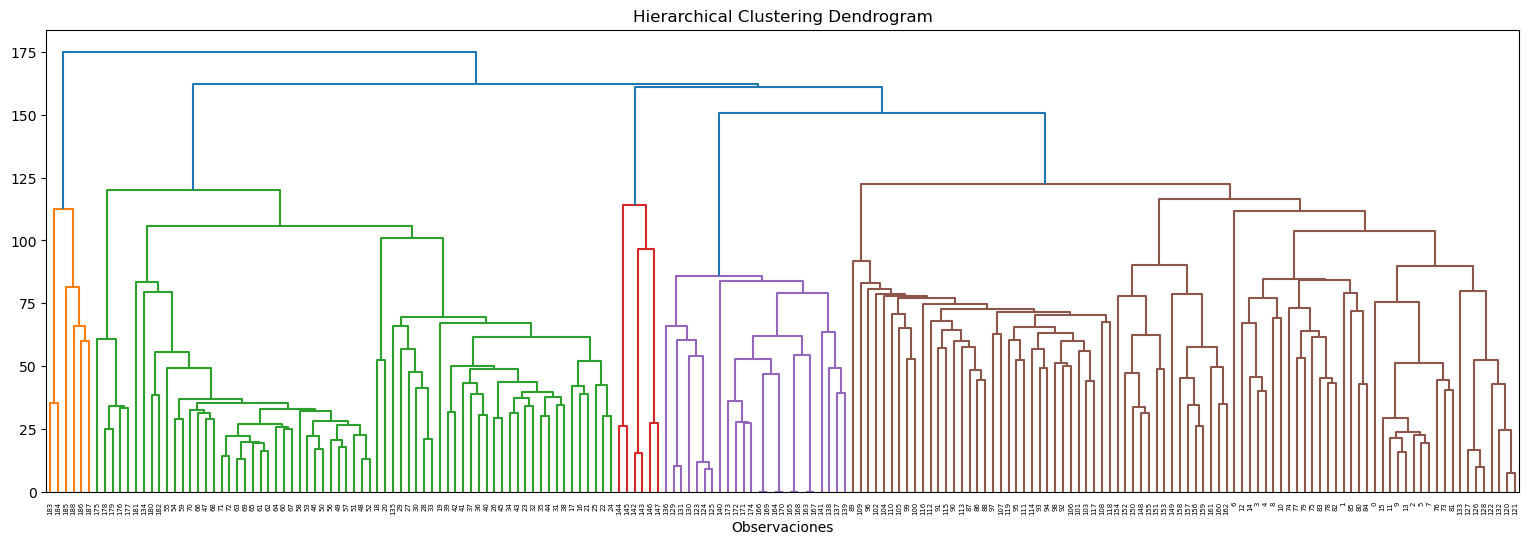

In [141]:
plt.figure(figsize=(19, 6))
plot_dendrogram(model, truncate_mode="level", p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observaciones")

plt.show()

C:\Users\sheil\AppData\Local\Temp\ipykernel_29592\799323613.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
C:\Users\sheil\AppData\Local\Temp\ipykernel_29592\799323613.py:14: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(25)


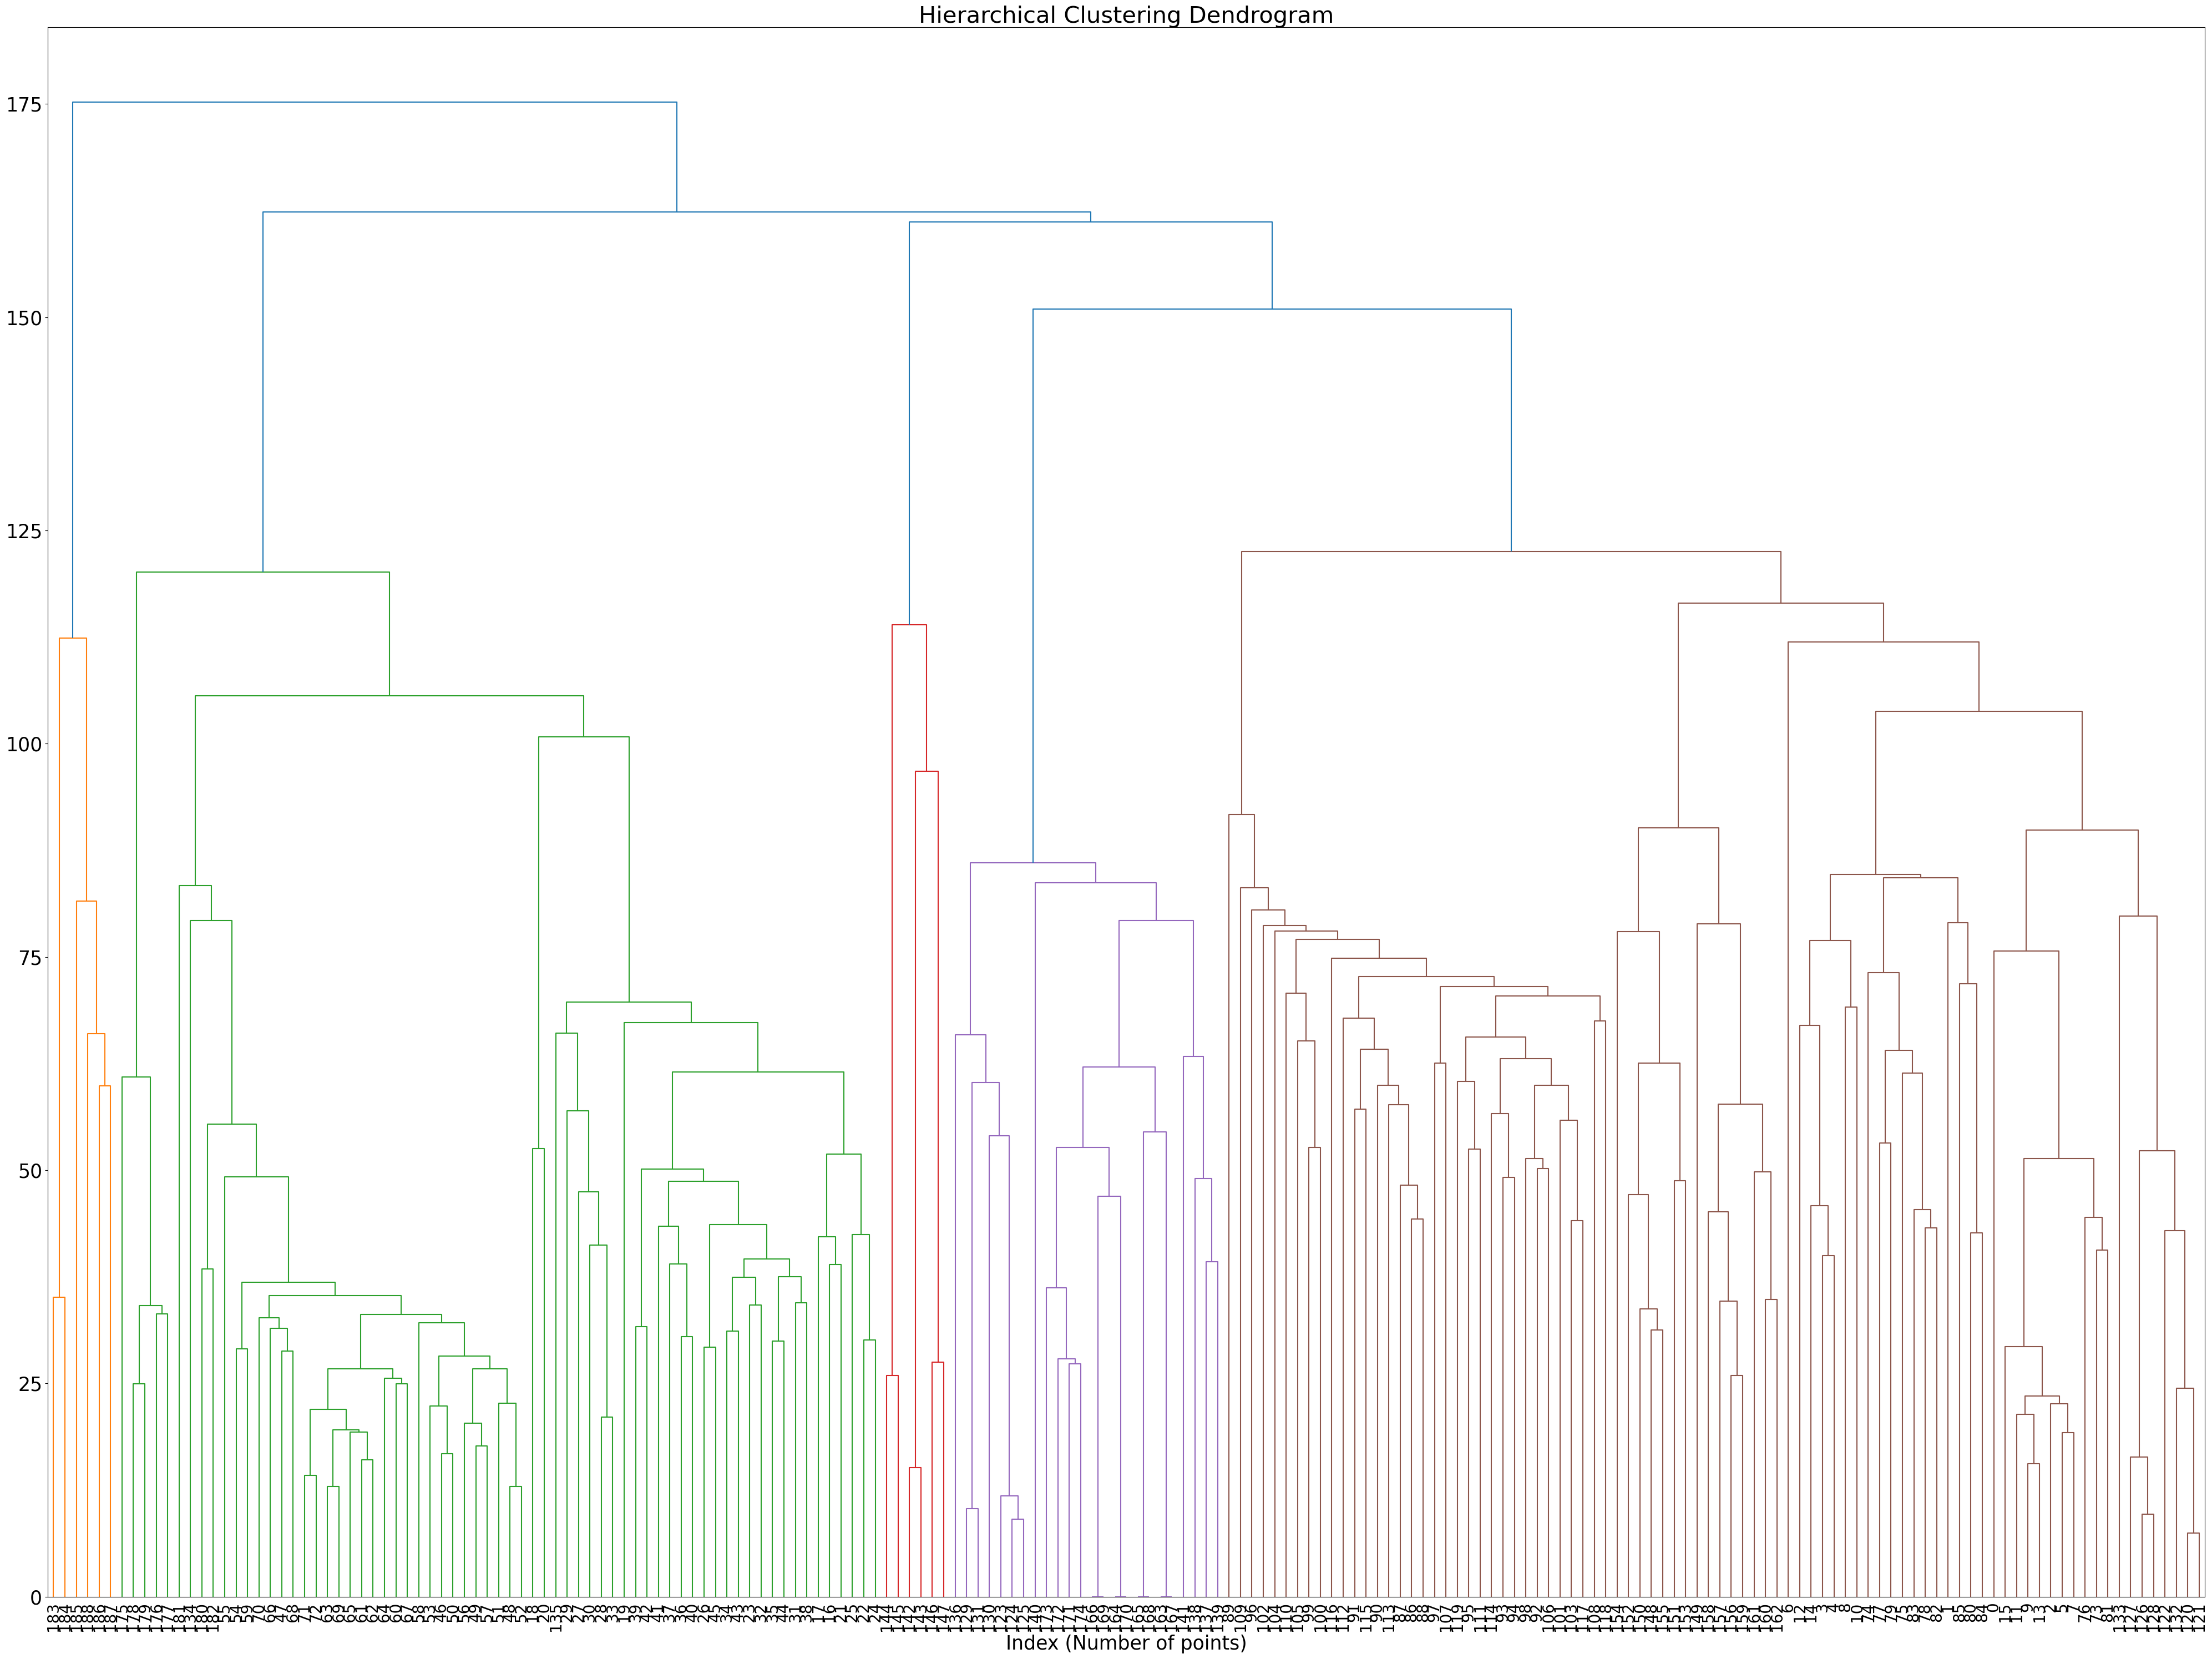

In [146]:
figure = plt.figure(figsize=(40, 30))

plot_dendrogram(model)

plt.title("Hierarchical Clustering Dendrogram", fontdict={"fontsize": 30})
plt.xlabel("Index (Number of points)", fontdict={"fontsize": 25})

axis = plt.gca()

for tick in axis.xaxis.get_major_ticks():
  tick.label.set_fontsize(20)

for tick in axis.yaxis.get_major_ticks():
  tick.label.set_fontsize(25)

figure.tight_layout()

plt.show()